### TITLE : Implementation of Principal Component Analysis in Python programming
    
### Course : Software Laboratory (CSC 320)
    
### Submitted to : MR. Ugwu
    
### By : Peter Christopher Abiodun

### Matric Number: CSC/2017/1183
    
### Under the Guidance of : MR. Ugwu
    
### Date : June, 2021

# TABLE OF CONTENTS



#### - Introduction
#### - Statement of the problem
#### - Algorithm
#### - Implementation
#### - User Guide
#### - Reference

 ##                                                  INTRODUCTION
          Principal Component Analysis (PCA) is a dimensionality reduction technique used to transform high-dimensional datasets into a dataset with fewer variables, where the set of resulting variables explains the maximum variance within the dataset, PCA is used prior to unsupervised and supervised machine learning steps to reduce the number of features used in analysis, thereby reducing the likelihood of error. It is basically a non-dependent procedures in which it reduces attribute space from a large number of variables to smaller number of factors, though PCA is no guarantee that the dimension is interpretable but the main task of PCA is to select a subset of variables from a larger set, based on which original variables have the highest correlation with principal amount.
        
          In all, Principal Components first principal components has maximum variance. With the little introduction above, we could list out  major uses of PCA, some of them are:
- It is used to find inter-relation between variables in the data
- It is used to interpret and visualize data
- As number of variables are decreasing, it makes further analysis simpler
- It's often used to visualize genetic distance and relatedness between populations




## STATEMENT OF THE PROBLEM

We'd take a look at a popular dataset, IRIS flower dataset. It contains in it some features like "sepal length", "sepal width", "petal width" and the target variable "species". The aim is to identify the class/species to which the flower belongs given some of its features, We'd use the PCA algorithm to interpret and visualize the data and thereby pick the principal components which would be passed to the next algorithm. it's a classification problem, hence, an algorithm called "K Nearest Neighbors (KNN)" would be implemented along side.

## PCA ALGORITHM AND IMPLEMENTATION

In [1]:
#import libraries
# The IRIS flower dataset would be imported through sklearn.datasets
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

In [2]:
iris = load_iris()

In [3]:
#lets view our features and target
print(iris.feature_names)
print(iris.target_names)
# input the above into a dataframe
data = pd.DataFrame(iris.data, columns = iris.feature_names)
data['CLASS'] = iris.target

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


In [4]:
#from the above output we are able to see the features and the target of the IRIS flower dataset
#let's visualize our data in the dataframe format
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),CLASS
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


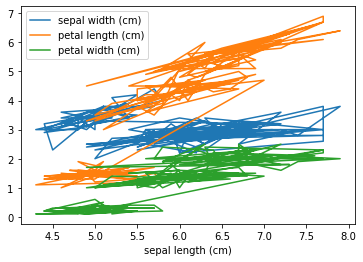

In [8]:

data.plot(0, [1,2,3], subplots  = False)

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   CLASS              150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [22]:
#check statistical info
data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),CLASS
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [23]:
#split the dataset into two
#one for the features only, the other for the target
# for the features
x = data.iloc[:,:4]
#for the target
y = data.iloc[:,4]
x.shape, y.shape

((150, 4), (150,))

In [24]:
#implementation of the PCA algorithm
from sklearn.decomposition import PCA
pca = PCA()
X = pca.fit_transform(x)
pca.get_covariance()

array([[ 0.68569351, -0.042434  ,  1.27431544,  0.51627069],
       [-0.042434  ,  0.18997942, -0.32965638, -0.12163937],
       [ 1.27431544, -0.32965638,  3.11627785,  1.2956094 ],
       [ 0.51627069, -0.12163937,  1.2956094 ,  0.58100626]])

In [25]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.92461872, 0.05306648, 0.01710261, 0.00521218])

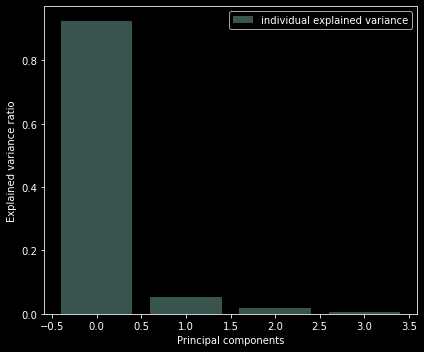

In [26]:
# Let's Visualize
with plt.style.context('dark_background'):
    plt.figure(figsize=(6,5))
    plt.bar(range(4), explained_variance, alpha = 0.4, align = 'center' , label = 'individual explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc= 'best')
    plt.tight_layout()
    

#### PCA was able to visualize that there are mainly only 3 components with significant variance
#### This gives an indication to select the number of principal components as 3

In [27]:
pca = PCA(n_components =3)
X = pca.fit_transform(x)

#### Finally, we've been able to visualize using PCA on an IRIS flower dataset, but as part of our aim, we would finalize all by classifying the species to which the flower belongs to, we'd use our 3 principal component gotten after the implementation of PCA above

In [28]:
# As we stated in the INTRODUCTION, we'd import an algorithm to classify the species to which the flower belongs to
# we'd be using the KNN classifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 20, stratify = y)


In [29]:
# Let's Train
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(7)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

Confusion matrix: 
 [[15  0  0]
 [ 0 14  1]
 [ 0  0 15]]


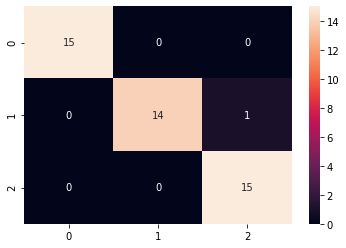

In [39]:
# Let's predict
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
# view the True positives, False Positives, True Negatives, False Negatives
conf_mat = confusion_matrix(y_test, y_pred)
print("Confusion matrix: \n" , conf_mat)
sns.heatmap(conf_mat, annot =True)

In [31]:
# Check the classification report
from sklearn.metrics import classification_report
class_report = classification_report(y_test, y_pred)
print("Classification report : \n" , class_report)

Classification report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      0.93      0.97        15
           2       0.94      1.00      0.97        15

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



In [32]:
print("Accuracy score for the model is:" , accuracy_score(y_test, y_pred)* 100 , "%")

Accuracy score for the model is: 97.77777777777777 %


#### Finally, we were able to get an approximate accuracy score of  97.8% for the classification of the species to which the flower belongs to with the help of Principal Component Analysis (PCA).

## REFERENCES

https://www.google.com/amp/s/www.geeksforgeeks.org/principal-component-analysis-with-python/amp/


https://builtin.com/data-science/step-step-explanation-principal-component-analysis

https://towardsdatascience.com/principal-component-analysis-pca-from-scratch-in-python-7f3e2a540c51


https://www.districtdatalabs.com/principal-component-analysis-with-python